In [1]:
from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()

In [3]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']], columns= iris_dataset['feature_names'] + ['target'])

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Visualización

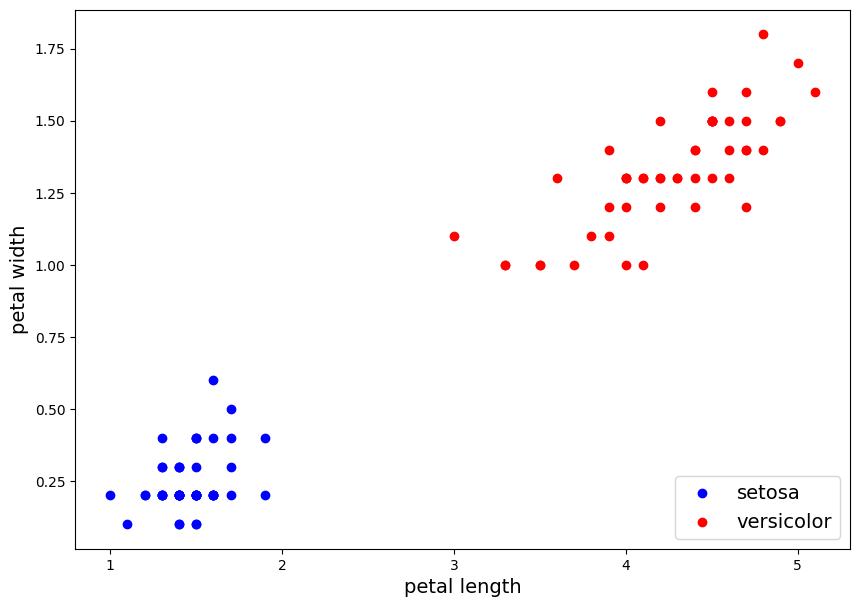

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))

plt.scatter(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0], c='b', label="setosa")


plt.scatter(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1], c='r', label="versicolor")

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)

plt.legend(loc="lower right", fontsize=14) #leyenda abajo a la derecha

plt.show()

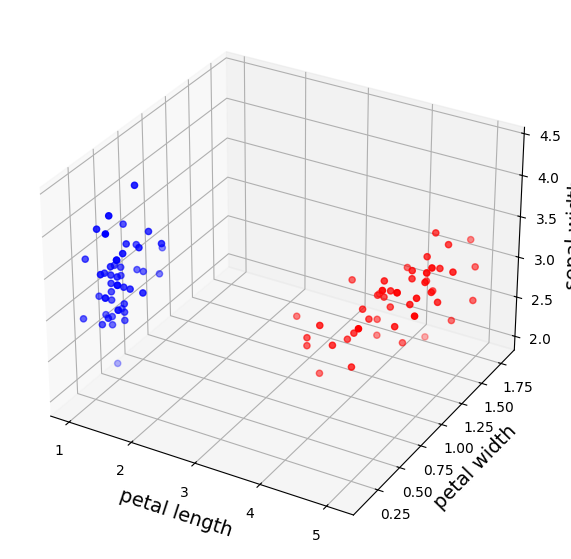

In [10]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0],
            df["sepal width (cm)"][df["target"] == 0], c='b', label="setosa")


ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1],
            df["sepal width (cm)"][df["target"] == 1], c='r', label="versicolor")

ax.set_xlabel("petal length", fontsize=14)
ax.set_ylabel("petal width", fontsize=14)
ax.set_zlabel("sepal width", fontsize=14)


plt.show()

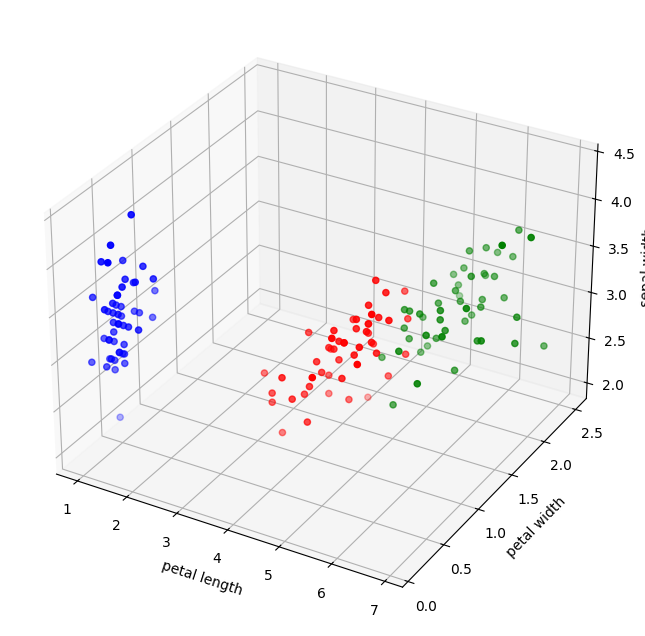

In [16]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0],
            df["sepal width (cm)"][df["target"] == 0], c='b', label="setosa")


ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1],
            df["sepal width (cm)"][df["target"] == 1], c='r', label="versicolor")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2],
            df["petal width (cm)"][df["target"] == 2],
            df["sepal width (cm)"][df["target"] == 2], c='g', label="virginica")

ax.set_xlabel("petal length", fontsize=10)
ax.set_ylabel("petal width", fontsize=10)
ax.set_zlabel("sepal width", fontsize=10)


plt.show()

# Entrenamiento

In [17]:
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced = df_reduced.loc[df_reduced["target"].isin([0,1])]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
95,4.2,1.2,1.0
96,4.2,1.3,1.0
97,4.3,1.3,1.0
98,3.0,1.1,1.0


In [18]:
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]] #para quedarte solo con las columnas que quieres
Y_df = df_reduced["target"]

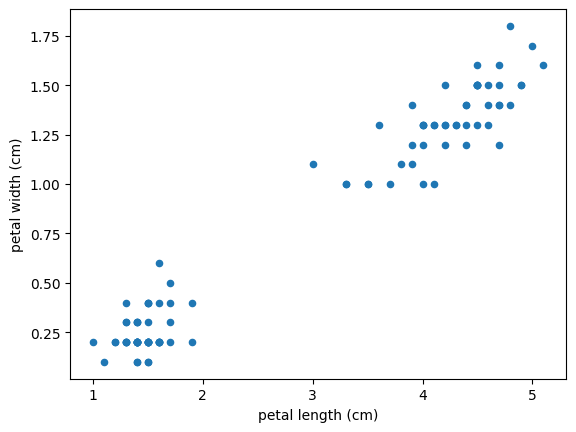

In [19]:
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

In [22]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, Y_df)

Perceptron(random_state=40)

## hw(x) = x1*w1 + h2*w2 + b      ->  hw(x) = X1*0.9 + X2*1.3 + (-3)

In [23]:
clf.coef_ #parametros del modelo optimos (w1, w2) pesos

array([[0.9, 1.3]])

In [24]:
clf.intercept_ #b

array([-3.])

In [31]:
X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                     np.linspace(mins[1], maxs[1], 1000))

xx, yy

(array([[0.9       , 0.9043043 , 0.90860861, ..., 5.19139139, 5.1956957 ,
         5.2       ],
        [0.9       , 0.9043043 , 0.90860861, ..., 5.19139139, 5.1956957 ,
         5.2       ],
        [0.9       , 0.9043043 , 0.90860861, ..., 5.19139139, 5.1956957 ,
         5.2       ],
        ...,
        [0.9       , 0.9043043 , 0.90860861, ..., 5.19139139, 5.1956957 ,
         5.2       ],
        [0.9       , 0.9043043 , 0.90860861, ..., 5.19139139, 5.1956957 ,
         5.2       ],
        [0.9       , 0.9043043 , 0.90860861, ..., 5.19139139, 5.1956957 ,
         5.2       ]]),
 array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.0019019, 0.0019019, 0.0019019, ..., 0.0019019, 0.0019019,
         0.0019019],
        [0.0038038, 0.0038038, 0.0038038, ..., 0.0038038, 0.0038038,
         0.0038038],
        ...,
        [1.8961962, 1.8961962, 1.8961962, ..., 1.8961962, 1.8961962,
         1.8961962],
        [1.8980981, 1.8980981, 1.898

In [32]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

c:\Users\joort\anaconda3\envs\curso_deep_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

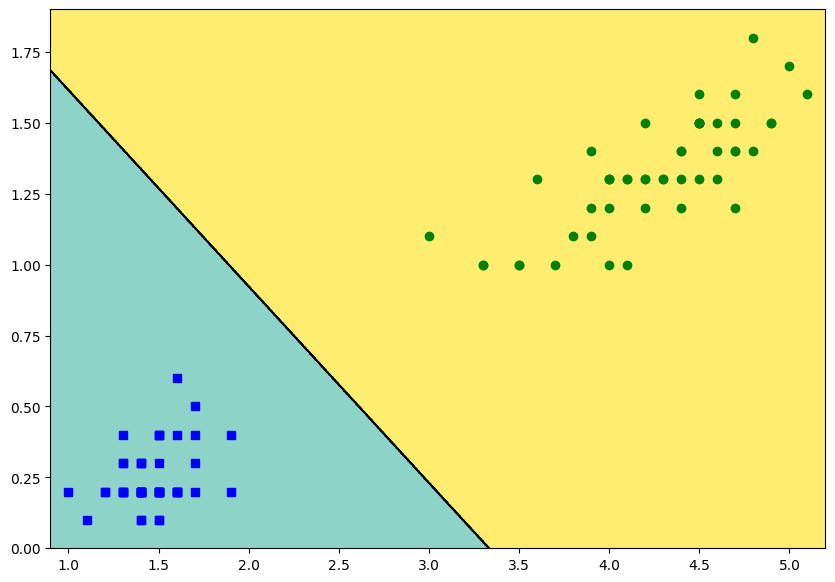

In [30]:
fig = plt.figure(figsize=(10,7))

plt.contourf(xx,yy,Z,cmap="Set3")
plt.contour(Z,extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:,0][Y_df==0], X[:,1][Y_df==0], 'bs', label="setosa")
plt.plot(X[:,0][Y_df==1], X[:,1][Y_df==1], 'go', label="versicolor")

In [33]:
y_pred = clf.predict(X_df)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_df,y_pred)

1.0